# __________CRIMES IN INDIA___

### C SOMA SEKHAR GOUD
### BATCH.NO:DSG0123

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

import json
import plotly.express as px

## Phase 1

Since the dataset which was provided is from period of 2001-2012 we shall collect data, perform analysis and other steps in this period only.

Phase-1:

We don’t have any of population, literacy rate & Area of states data in the given dataset, so we extract the data from the offical online sources.
https://censusindia.gov.in/
https://www.indiastat.com/specimen-tables/demographics
https://socialjustice.gov.in/common/76669
https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_literacy_rate

After going through official websites it is found that survey is conducted for very 10 years(decade) so we get data for 2001 & 2011.

All data cleaning and alignment is done in Excel.

In [4]:
df_phase1 = pd.read_excel('Phase1_data.xlsx')
df_phase1.head()

,State/UT,Latitude,Longitude,Population_2001,Males_2001,Females_2001,Population_2011,Males_2011,Females_2011,Literacy_2001,Literacy_2011,Area(sqkm)
0,Andaman and Nicobar Islands,11.7401,92.6586,314239,170319,143920,380581,197843,182738,81.30,86.63,8249
1,Andhra Pradesh,15.9129,79.7400,76210007,38082754,38127253,84580777,42438618,42142159,60.47,67.02,162975
2,Arunachal Pradesh,28.2180,94.7278,1097968,579941,517027,1383727,713912,669815,54.34,65.38,83743
3,Assam,26.2006,92.9376,26655528,13571192,13084336,31205576,15939443,15266133,63.25,72.19,78438
4,Bihar,25.0961,85.3131,82998509,43243795,39754714,104099452,54278157,49821395,47.00,61.80,94163


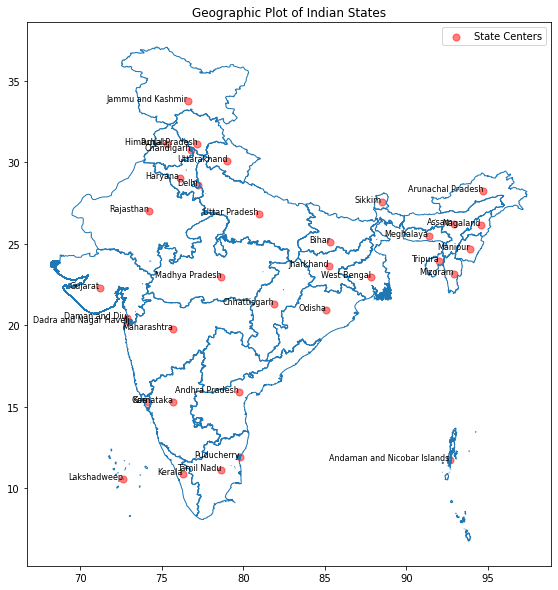

In [5]:
# Create a GeoDataFrame from the data
gdf = gpd.GeoDataFrame(df_phase1, geometry=gpd.points_from_xy(df_phase1['Longitude'], df_phase1['Latitude']))

# Loading the Indian states map
india_map = gpd.read_file("states_india.geojson") 

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
india_map.boundary.plot(ax=ax, linewidth=1)
gdf.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.5, label='State Centers')

# Add labels for each point
for x, y, label in zip(gdf['Longitude'], gdf['Latitude'], gdf['State/UT']):
    ax.text(x, y, label, fontsize=8, ha='right')

plt.title('Geographic Plot of Indian States')
plt.legend()
plt.show()

In [6]:
# .shx is a shape file which we use for better boundaries visualization

# Read the shapefile
shp_gdf = gpd.read_file('india-polygon.shp')

# Save to GeoPackage
shp_gdf.to_file('India_Country_Boundary.gpkg', driver='GPKG')


In [8]:
india_map = gpd.read_file("India_Country_Boundary.gpkg")
india_map.head()

,geometry
0,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [9]:
merge_data = pd.merge(df_phase1, india_map, how='outer', left_index=True, right_index=True)

# Label the resulting column as "geometry"
merge_data = merge_data.rename(columns={'your_column_name': 'geometry'})

merge_data

,State/UT,Latitude,Longitude,Population_2001,Males_2001,Females_2001,Population_2011,Males_2011,Females_2011,Literacy_2001,Literacy_2011,Area(sqkm),geometry
0,Andaman and Nicobar Islands,11.7401,92.6586,314239.0,170319.0,143920.0,380581.0,197843.0,182738.0,81.30,86.63,8249.0,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,Andhra Pradesh,15.9129,79.7400,76210007.0,38082754.0,38127253.0,84580777.0,42438618.0,42142159.0,60.47,67.02,162975.0,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,Arunachal Pradesh,28.2180,94.7278,1097968.0,579941.0,517027.0,1383727.0,713912.0,669815.0,54.34,65.38,83743.0,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,Assam,26.2006,92.9376,26655528.0,13571192.0,13084336.0,31205576.0,15939443.0,15266133.0,63.25,72.19,78438.0,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,Bihar,25.0961,85.3131,82998509.0,43243795.0,39754714.0,104099452.0,54278157.0,49821395.0,47.00,61.80,94163.0,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."
5,Chandigarh,30.7333,76.7794,900635.0,494206.0,406429.0,1055450.0,580663.0,474787.0,81.94,86.05,114.0,"POLYGON ((83.94694 23.62196, 83.95594 23.62406..."
6,Chhattisgarh,21.2787,81.8661,20833803.0,10427874.0,10405929.0,25545198.0,12832895.0,12712303.0,64.66,70.28,135194.0,"POLYGON ((73.20640 20.12165, 73.20865 20.10695..."
7,Dadra and Nagar Haveli,20.1809,73.0169,220490.0,118078.0,102412.0,343709.0,182580.0,161129.0,57.63,76.24,491.0,"POLYGON ((72.80144 20.37378, 72.84418 20.47463..."
8,Daman and Diu,20.4283,72.8397,158204.0,82743.0,75461.0,242911.0,126476.0,116435.0,78.18,87.10,111.0,"POLYGON ((74.11982 15.65278, 74.24806 15.65698..."
9,Delhi,28.6139,77.2090,13850507.0,7493449.0,6357048.0,16787941.0,8987325.0,7790616.0,81.67,86.21,1484.0,"MULTIPOLYGON (((68.35808 23.80475, 68.41658 23..."


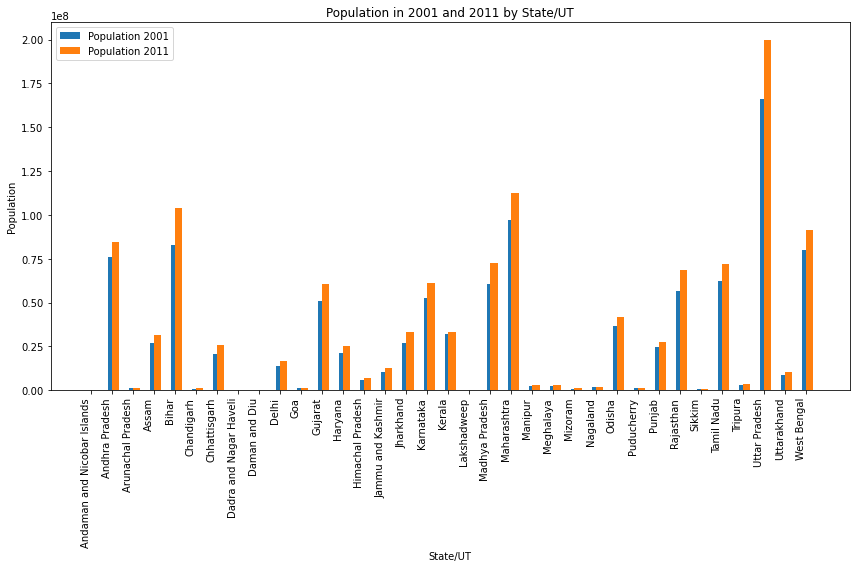

In [10]:
# Extracting relevant data
states = df_phase1['State/UT']
population_2001 = df_phase1['Population_2001']
population_2011 = df_phase1['Population_2011']

# Creating the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35

bar1 = plt.bar(states, population_2001, width=bar_width, label='Population 2001')
bar2 = plt.bar(states, population_2011, width=bar_width, label='Population 2011', align='edge')

plt.xlabel('State/UT')
plt.ylabel('Population')
plt.title('Population in 2001 and 2011 by State/UT')
plt.xticks(rotation=90, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

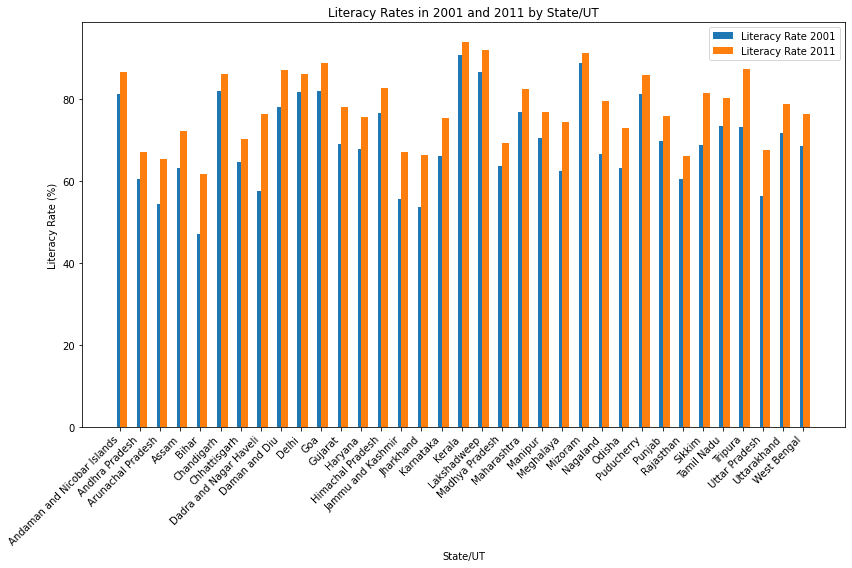

In [11]:
# Extracting relevant data
states = df_phase1['State/UT']
literacy_2001 = df_phase1['Literacy_2001']
literacy_2011 = df_phase1['Literacy_2011']

# Creating the bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35

bar1 = plt.bar(states, literacy_2001, width=bar_width, label='Literacy Rate 2001')
bar2 = plt.bar(states, literacy_2011, width=bar_width, label='Literacy Rate 2011', align='edge')

# Adding labels and title
plt.xlabel('State/UT')
plt.ylabel('Literacy Rate (%)')
plt.title('Literacy Rates in 2001 and 2011 by State/UT')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Over the course of time population literacy in state has been increased

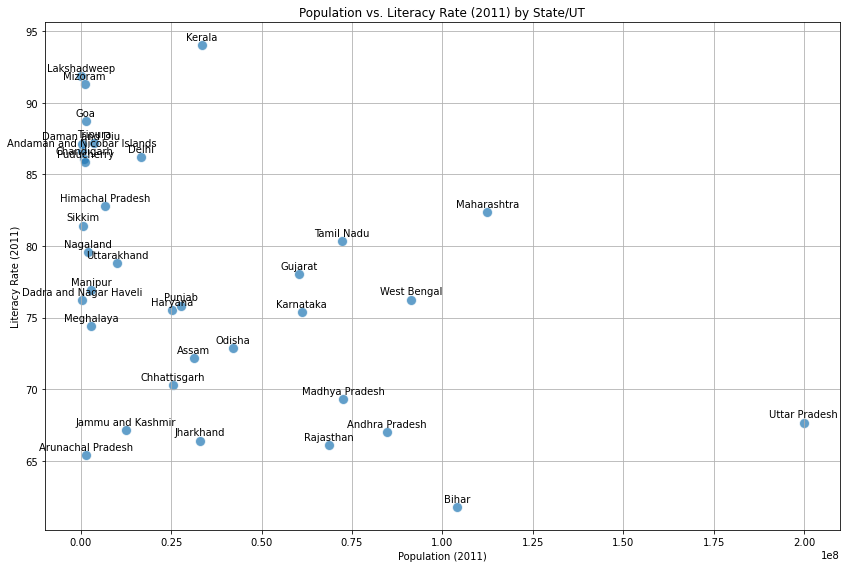

In [15]:
population_2011 = df_phase1['Population_2011']
literacy_2011 = df_phase1['Literacy_2011']

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(population_2011, literacy_2011, s=100, alpha=0.7, edgecolors='w', linewidths=1)

# Adding labels and title
plt.xlabel('Population (2011)')
plt.ylabel('Literacy Rate (2011)')
plt.title('Population vs. Literacy Rate (2011) by State/UT')

# Adding state labels for each point
for i, state in enumerate(df_phase1['State/UT']):
    plt.annotate(state, (population_2011[i], literacy_2011[i]), textcoords="offset points", xytext=(0,5), ha='center')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

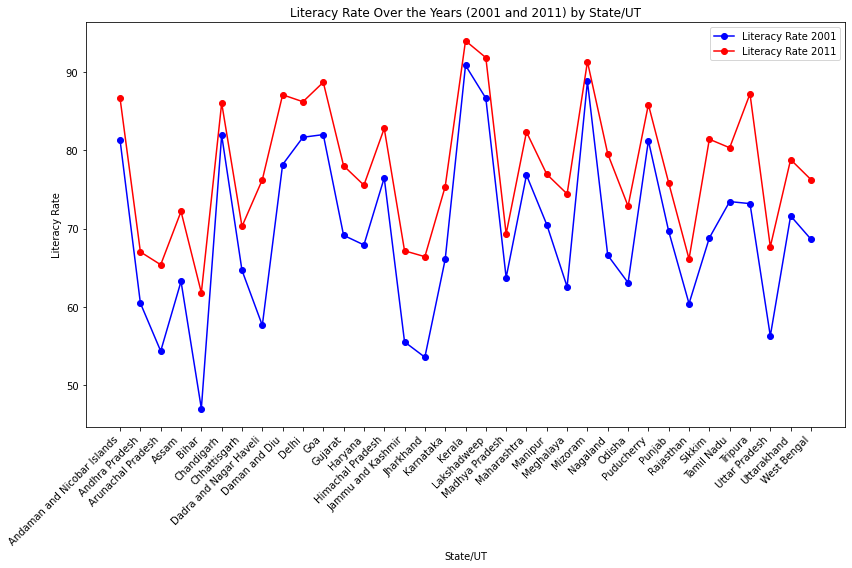

In [16]:
states = df_phase1['State/UT']
literacy_2001 = df_phase1['Literacy_2001']
literacy_2011 = df_phase1['Literacy_2011']

# Creating the line chart
plt.figure(figsize=(12, 8))
plt.plot(states, literacy_2001, marker='o', label='Literacy Rate 2001', linestyle='-', color='b')
plt.plot(states, literacy_2011, marker='o', label='Literacy Rate 2011', linestyle='-', color='r')

# Adding labels and title
plt.xlabel('State/UT')
plt.ylabel('Literacy Rate')
plt.title('Literacy Rate Over the Years (2001 and 2011) by State/UT')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

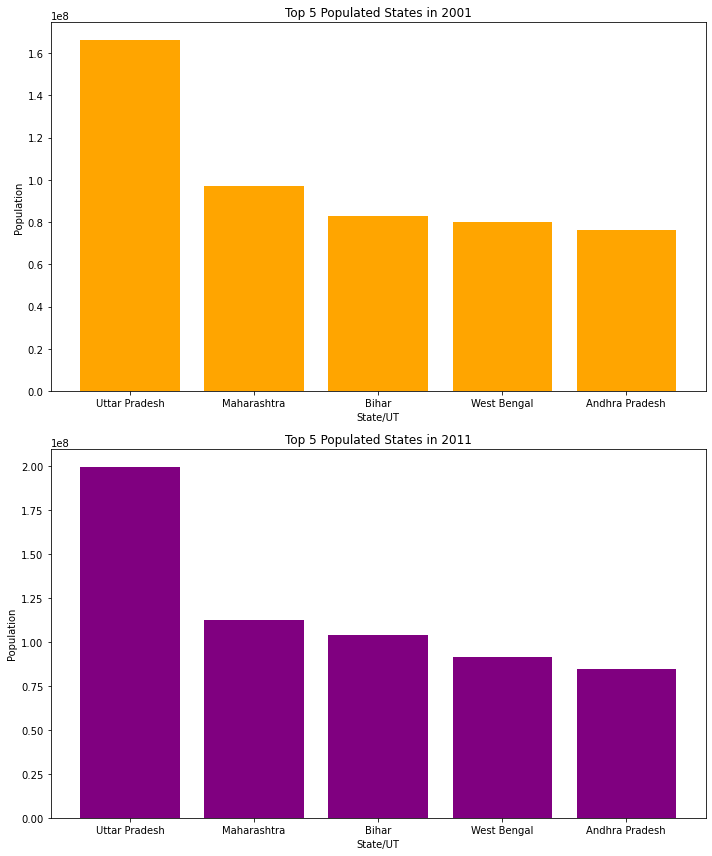

In [33]:
# Select the top 5 populated states in 2001
top_5_populated_2001 = df_phase1.nlargest(5, 'Population_2001')[['State/UT', 'Population_2001']]

# Select the top 5 populated states in 2011
top_5_populated_2011 = df_phase1.nlargest(5, 'Population_2011')[['State/UT', 'Population_2011']]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Top 5 populated states in 2001
axes[0].bar(top_5_populated_2001['State/UT'], top_5_populated_2001['Population_2001'], color='orange')
axes[0].set_title('Top 5 Populated States in 2001')
axes[0].set_xlabel('State/UT')
axes[0].set_ylabel('Population')

# Top 5 populated states in 2011
axes[1].bar(top_5_populated_2011['State/UT'], top_5_populated_2011['Population_2011'], color='purple')
axes[1].set_title('Top 5 Populated States in 2011')
axes[1].set_xlabel('State/UT')
axes[1].set_ylabel('Population')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

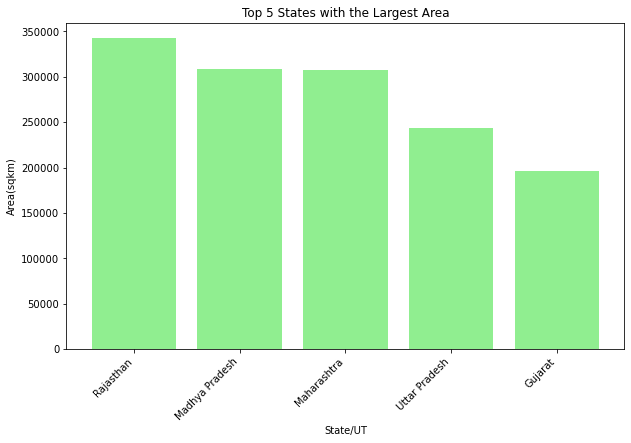

In [21]:
top_5_largest_area_states = df_phase1.nlargest(5, 'Area(sqkm)')[['State/UT', 'Area(sqkm)']]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_largest_area_states['State/UT'], top_5_largest_area_states['Area(sqkm)'], color='lightgreen')
plt.title('Top 5 States with the Largest Area')
plt.xlabel('State/UT')
plt.ylabel('Area(sqkm)')
plt.xticks(rotation=45, ha='right')
plt.show()

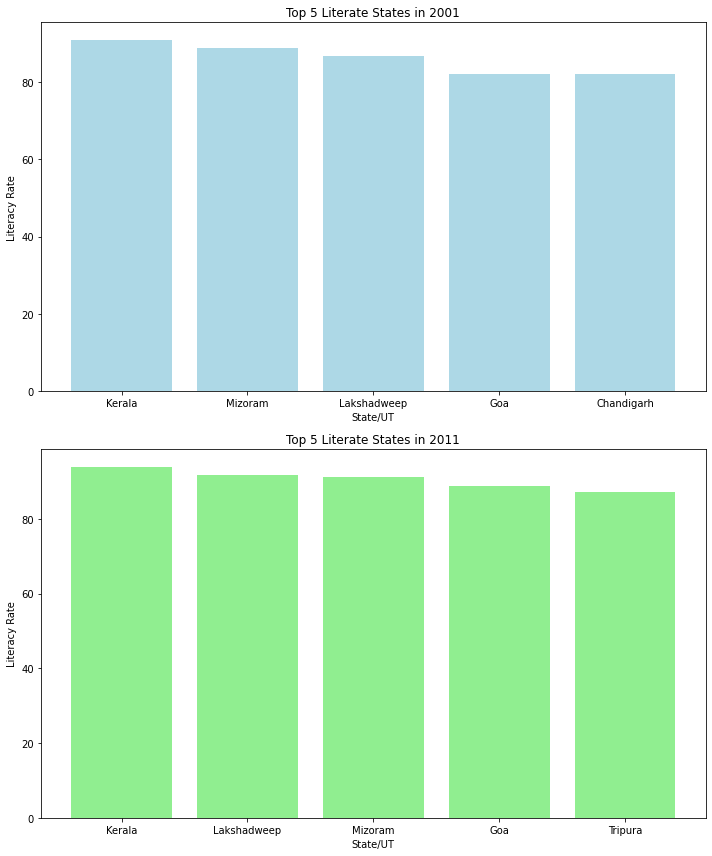

In [31]:
# Select the top 5 literate states in 2001
top_5_literate_2001 = df_phase1.nlargest(5, 'Literacy_2001')[['State/UT', 'Literacy_2001']]

# Select the top 5 literate states in 2011
top_5_literate_2011 = df_phase1.nlargest(5, 'Literacy_2011')[['State/UT', 'Literacy_2011']]

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Top 5 literate states in 2001
axes[0].bar(top_5_literate_2001['State/UT'], top_5_literate_2001['Literacy_2001'], color='lightblue')
axes[0].set_title('Top 5 Literate States in 2001')
axes[0].set_xlabel('State/UT')
axes[0].set_ylabel('Literacy Rate')

# Top 5 literate states in 2011
axes[1].bar(top_5_literate_2011['State/UT'], top_5_literate_2011['Literacy_2011'], color='lightgreen')
axes[1].set_title('Top 5 Literate States in 2011')
axes[1].set_xlabel('State/UT')
axes[1].set_ylabel('Literacy Rate')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
